# HiSC
sample datasets first, Enzymes dataset below

In [1]:
# load HiSC functions
from HiSC import process_csv, HiSC, reachability_plot, get_clusters
from HiSC import adjusted_mutual_info_score, homogeneity_score, silhouette_score, normalized_mutual_info_score

### Select a sample dataset

The function process_csv() reads input files. Note that most of the supplied sample datasets have true labels in the last column. Set the parameter true_labels=False, then the function only returns X.

In [2]:
# working sample datasets
# data, labels_true = process_csv("./test_data/3-gaussian-3d-adj.csv")
# alpha = 0.007
# k = 4

data, labels_true = process_csv("./test_data/subspaces-5d-adj.csv")
alpha = 0.02
k = 4

# data, labels_true = process_csv("./test_data/SpiralData2_very_noisy_2.csv", sep=",")
# alpha = 0.015
# k = 2

# data, labels_true = process_csv("./test_data/DS1.txt", sep=" ")
# alpha = 0.0015
# k = 2

### Initialize the clustering algorithm

In [3]:
HiSC_ordering = HiSC(data, alpha, k, elki=True)

print ()
print ("First 10 data points:")

for p in HiSC_ordering[:10]:
    print(p)    

Running HiSC, input dataset has 700 entries with 5 dimensions
Computing hierarchical structure |████████████████████| 100.0% complete
First 10 data points:
id:     0, pred:     0, subs:  1, dist: 0.00000, label:    -1
id:   367, pred:     0, subs:  6, dist: 0.00000, label:    -1
id:    42, pred:     0, subs:  6, dist: 0.00000, label:    -1
id:    47, pred:   367, subs:  5, dist: 0.00000, label:    -1
id:    45, pred:     0, subs:  5, dist: 0.02168, label:    -1
id:   387, pred:    45, subs:  5, dist: 0.10852, label:    -1
id:    24, pred:    42, subs:  5, dist: 0.11601, label:    -1
id:   399, pred:     0, subs:  5, dist: 0.39675, label:    -1
id:   361, pred:   387, subs:  4, dist: 0.04765, label:    -1
id:   395, pred:    24, subs:  4, dist: 0.05093, label:    -1


### Reachability plot without labels

As first step, assuming we don't have access to true labels, we can plot the
reachability plot without assigning a threshold reachability distance. Note that the "dimensions" flag selects how many 2d-plots are generated at the top. For example, dimensions=[(0,1),(1,2),(2,3),(3,4)] plots 4 2d-plots. If we set the flag to False, only the reachability plot will be displayed.

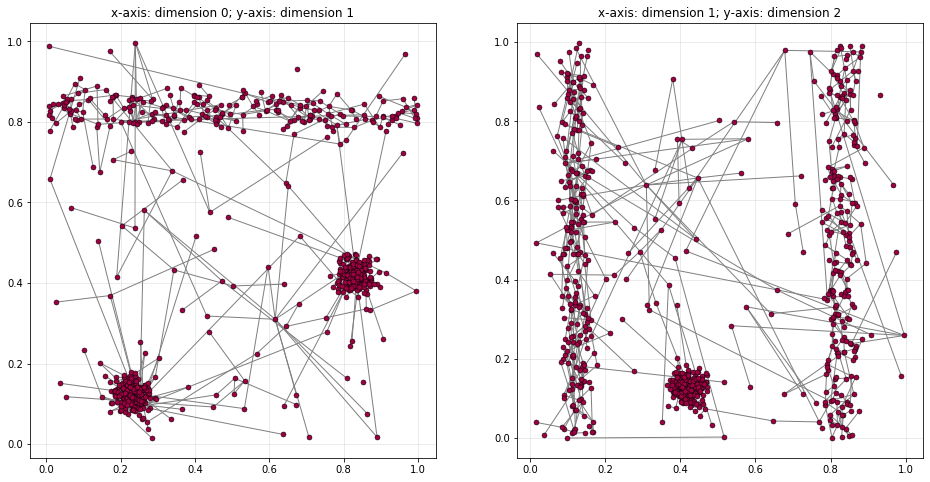

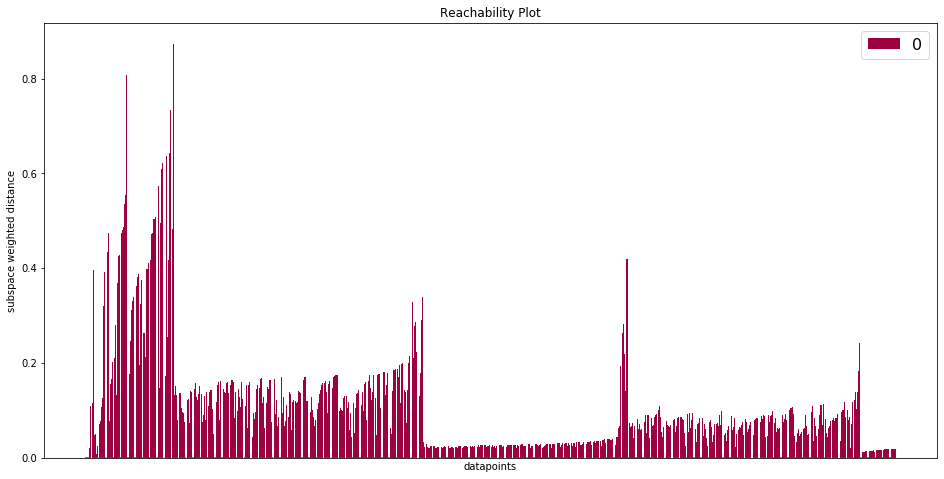

In [4]:
reachability_plot(data, HiSC_ordering)

### Reachability plot with computed labels

Depending on the outcome of the clustering, we can now select a threshold which depends on the y-axis (weighted subspace distance) of the reachability plot. In the example below, 0.2 is selected. The function get_clusters() now assigns clusters based on this threshold. Here, two different 2d plots are plotted as comparison.

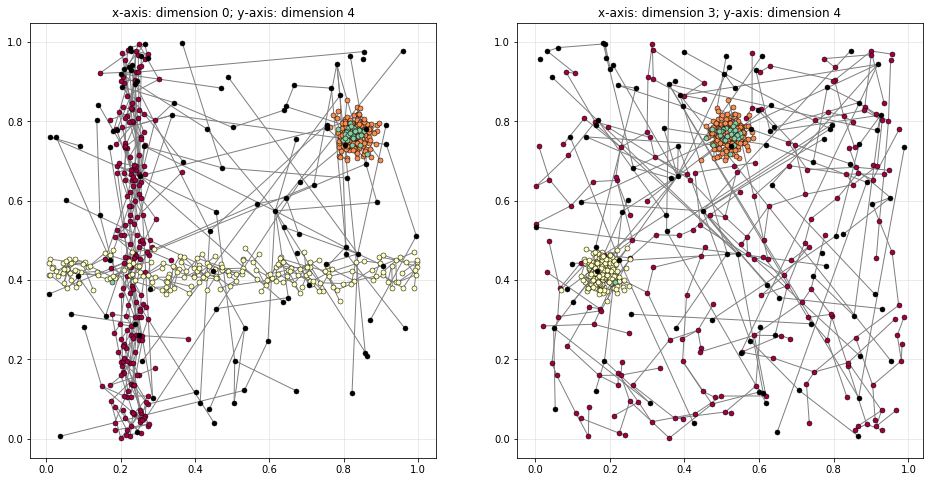

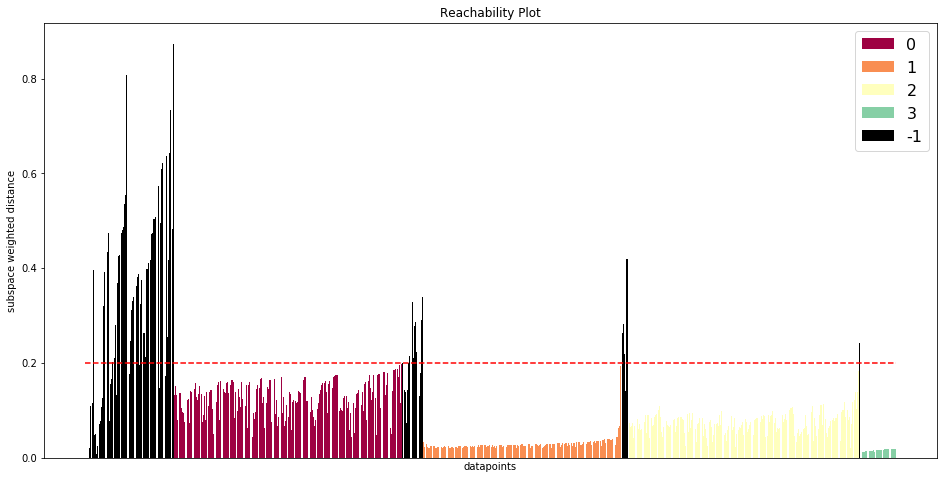

Adjusted mutual information score: 0.85
Normalized mutual information score: 0.85
Homogeneity score: 0.89
Silhouette_score: 0.17


In [12]:
threshold = 0.2
plot_dimensions = [(0,4),(3,4)]

labels = get_clusters(HiSC_ordering, threshold=threshold)
reachability_plot(data, HiSC_ordering, labels, threshold, dimensions=plot_dimensions)

print (f"Adjusted mutual information score: {adjusted_mutual_info_score(labels_true, labels):.2f}")
print (f"Normalized mutual information score: {normalized_mutual_info_score(labels_true, labels):.2f}")
print (f"Homogeneity score: {homogeneity_score(labels_true, labels):.2f}")
print (f"Silhouette_score: {silhouette_score(data, labels):.2f}")

### Reachability plot with true labels as comparison

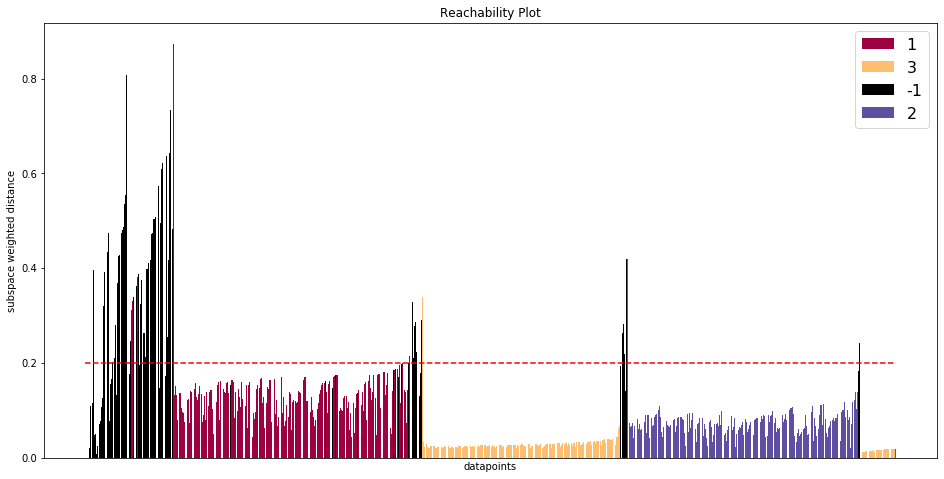

In [10]:
reachability_plot(data, HiSC_ordering, labels_true, threshold, dimensions=False)

# Enzymes dataset

In [31]:
# Select the Enzymes dataset as input

# dataset_file = "./test_data/ENZYMES_gram_matrix_wl5.csv"
# label_file = "../test_data/ENZYMES_graph_labels.txt"

dataset_file = "./test_data/ENZYMES_gram_matrix_wl4_filtered.csv"
label_file = "./test_data/ENZYMES_graph_labels_filtered.txt"

data, labels_true = process_csv(dataset_file, input_filename_labels=label_file, sep=";")

In [30]:
# this takes 5-10 seconds for the enzymes WL5 dataset

# Settings
alpha = 0.007
k = 4

# run HiSC
HiSC_ordering = HiSC(data, alpha, k, verbose=False, elki=True)

print ()
print ("First 10 data points:")

for p in HiSC_ordering[:10]:
    print(p)    

Running HiSC, input dataset has 488 entries with 488 dimensions
Computing hierarchical structure |████████████████████| 100.0% complete
First 10 data points:
id:     0, pred:     0, subs:  4, dist: 0.00000, label:    -1
id:   385, pred:     0, subs: 44, dist: 5.09599, label:    -1
id:   293, pred:     0, subs: 26, dist: 6.43531, label:    -1
id:   119, pred:     0, subs: 14, dist: 3.36254, label:    -1
id:   250, pred:     0, subs: 13, dist: 6.10057, label:    -1
id:   102, pred:   119, subs: 12, dist: 0.86279, label:    -1
id:   118, pred:     0, subs: 12, dist: 2.68855, label:    -1
id:   292, pred:     0, subs: 12, dist: 4.25268, label:    -1
id:   106, pred:   292, subs: 12, dist: 0.67704, label:    -1
id:   371, pred:   250, subs: 11, dist: 0.75112, label:    -1


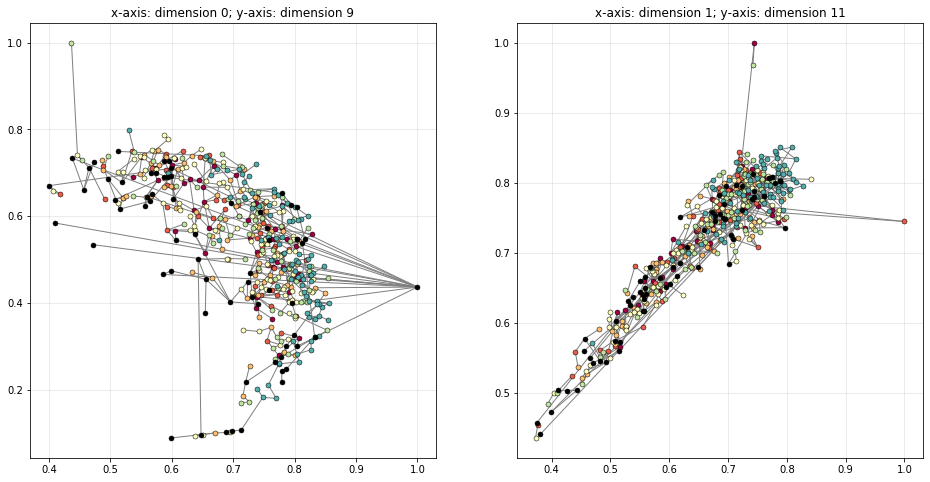

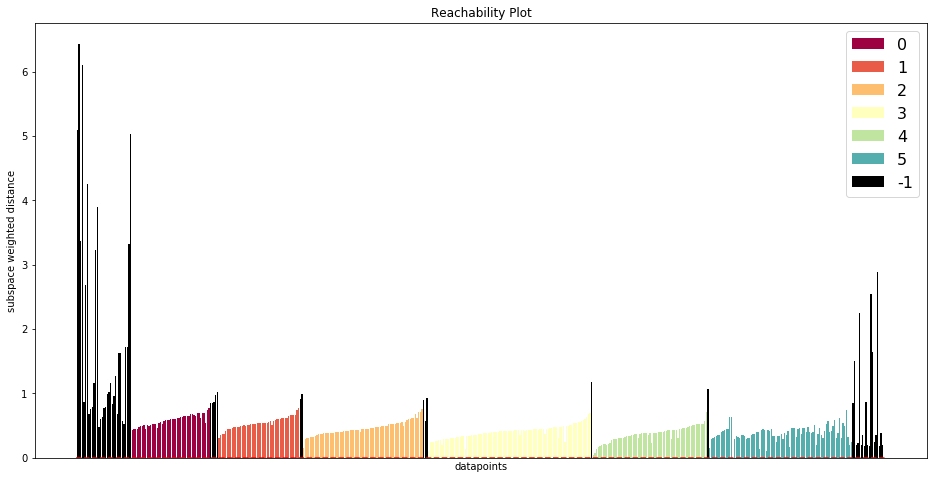

Adjusted mutual information score: 0.01
Normalized mutual information score: 0.03
Homogeneity score: 0.03
Silhouette_score: -0.10


In [41]:
# reachability threshold
threshold = 0.8

# generate labels with threshold
labels = get_clusters(HiSC_ordering, threshold=threshold)

# select dimensions for 2d plots
dimensions=[(0,9),(1,11)]

reachability_plot(data, HiSC_ordering, labels, dimensions=dimensions)

print (f"Adjusted mutual information score: {adjusted_mutual_info_score(labels_true, labels):.2f}")
print (f"Normalized mutual information score: {normalized_mutual_info_score(labels_true, labels):.2f}")
print (f"Homogeneity score: {homogeneity_score(labels_true, labels):.2f}")
print (f"Silhouette_score: {silhouette_score(data, labels):.2f}")

# 2 moons input

use sklearn to generate sample input

In [28]:
from sklearn import cluster, datasets, mixture
# https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-download-auto-examples-cluster-plot-cluster-comparison-py

# generate dataset
n_samples = 400
noisy_moons_X, noisy_moons_y = datasets.make_moons(n_samples=n_samples, noise=.05)

# HiSC settings
alpha = 0.003
k = 2
threshold = 0.3

# run HiSC and generate labels
moon_ordering = HiSC(noisy_moons_X, alpha, k)
pred_moon_labels = get_clusters(moon_ordering, threshold=threshold)

Running HiSC, input dataset has 400 entries with 2 dimensions


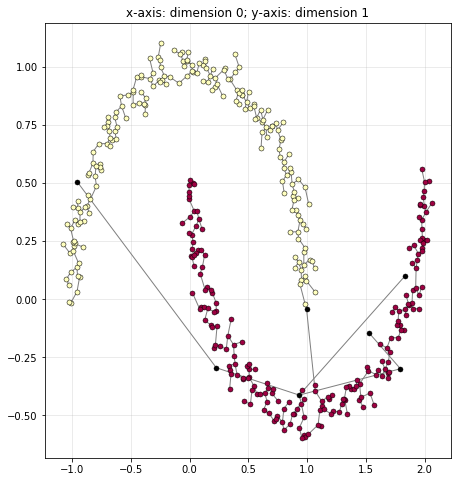

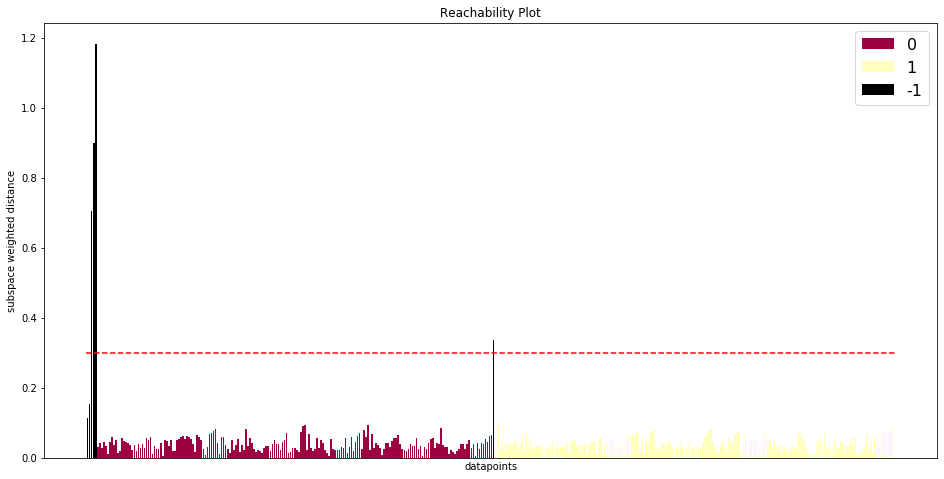

In [29]:
reachability_plot(noisy_moons_X, moon_ordering, pred_moon_labels, threshold=threshold, dimensions=[(0,1)])